In [1]:
# Importing required libraries
import os
import pandas as pd
import librosa
import numpy as np
from tqdm import tqdm

In [2]:
#  Set your paths
train_csv_path = "C:/Users/Pranjal/Downloads/train.csv"
train_audio_folder = "C:/Users/Pranjal/Downloads/train_audio/"


In [3]:

# Loading dataset from CSV file
train_df = pd.read_csv('train.csv')

In [4]:
train_df

,filename,label
0,audio_1261.wav,1.0
1,audio_942.wav,1.5
2,audio_1110.wav,1.5
3,audio_1024.wav,1.5
4,audio_538.wav,2.0
...,...,...
439,audio_494.wav,5.0
440,audio_363.wav,5.0
441,audio_481.wav,5.0
442,audio_989.wav,5.0


In [6]:
#  Store features and labels
features = []
labels = []

In [7]:
#  Loop through each row and extract features
for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    file_name = row["filename"]  # Make sure your CSV column is named 'filename'
    label = row["label"]

    #  Corrected path using raw string and file_name
    file_path = os.path.join(r"C:\Users\Pranjal\OneDrive\Desktop\chitra\audios_train", file_name)

    try:
        # Load audio
        y, sr = librosa.load(file_path, sr=None)

        # Extract MFCC features
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        #  Store features and label
        features.append(mfcc_mean)
        labels.append(label)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

#  Convert to NumPy arrays
X = np.array(features)
y = np.array(labels)

print("✅ Audio preprocessing complete. Feature shape:", X.shape)

  0%|                                              | 0/444 [00:00<?, ?it/s]C:\Users\Pranjal\Downloads\Telegram Desktop\New folder\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,
100%|████████████████████████████████████| 444/444 [00:48<00:00,  9.15it/s]

✅ Audio preprocessing complete. Feature shape: (444, 13)


In [10]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
# Defining the machine learning model
from sklearn.linear_model import LinearRegression
# Evaluating the model performance
from sklearn.metrics import mean_squared_error
# Evaluating the model performance
from scipy.stats import pearsonr
# Importing required libraries
import matplotlib.pyplot as plt
# Defining the machine learning model
from sklearn.svm import SVR
# Defining the machine learning model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Evaluating the model performance
from sklearn.metrics import mean_squared_error
# Evaluating the model performance
from scipy.stats import pearsonr

In [11]:
# Splitting the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Evaluating the model performance
from sklearn.metrics import mean_squared_error
# Evaluating the model performance
from scipy.stats import pearsonr

#  Initialize models
models = {

    "Linear Regression": LinearRegression(),

    "Support Vector Regression": SVR(),

    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),

    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store scores for comparison
model_scores = []

#  Evaluate each model
for name, model in models.items():
# Training the model with training data
    model.fit(X_train, y_train)
# Predicting target values using the test data
    y_pred = model.predict(X_val)

# Evaluating the model performance
    mse = mean_squared_error(y_val, y_pred)
# Evaluating the model performance
    pearson_corr, _ = pearsonr(y_val, y_pred)

    print(f"🔍 {name}")
    print(f"   📉 MSE: {mse:.4f}")
    print(f"   📈 Pearson Correlation: {pearson_corr:.4f}\n")

    # 📦 Save scores
    model_scores.append((name, mse, pearson_corr))
    # 📌 Sort by Pearson Correlation (descending)
Final_model = sorted(model_scores, key=lambda x: (-x[2], x[1]))[0]
print(f"🏆 Final Model: {Final_model[0]} (MSE={Final_model[1]:.4f}, Pearson={Final_model[2]:.4f})")

🔍 Linear Regression
   📉 MSE: 1.2467
   📈 Pearson Correlation: 0.3007

🔍 Support Vector Regression
   📉 MSE: 1.2739
   📈 Pearson Correlation: 0.2812

🔍 Random Forest Regressor
   📉 MSE: 1.1787
   📈 Pearson Correlation: 0.3688

🔍 Gradient Boosting Regressor
   📉 MSE: 1.3487
   📈 Pearson Correlation: 0.2460

🏆 Final Model: Random Forest Regressor (MSE=1.1787, Pearson=0.3688)


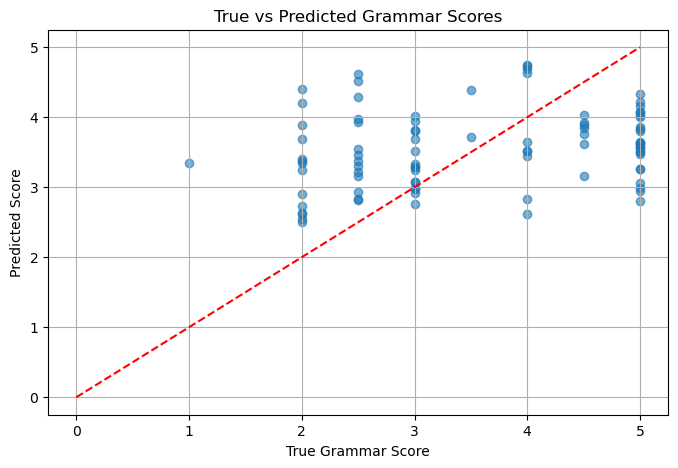

In [14]:
#  Optional: Visualize true vs predicted
plt.figure(figsize=(8,5))
plt.scatter(y_val, y_pred, alpha=0.6)
plt.plot([0, 5], [0, 5], color='red', linestyle='--')
plt.xlabel("True Grammar Score")
plt.ylabel("Predicted Score")
plt.title("True vs Predicted Grammar Scores")
plt.grid(True)
plt.show()

In [16]:
pip install transformers torchaudio

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Load test.csv
# Loading dataset from CSV file
test_df = pd.read_csv("test.csv")

test_features = []
file_names = []

for i, row in tqdm(test_df.iterrows(), total=len(test_df)):
    file_name = row["filename"]
    file_path = os.path.join(r"C:\Users\Pranjal\OneDrive\Desktop\audios_test", file_name)

    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        test_features.append(mfcc_mean)
        file_names.append(file_name)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

X_test = np.array(test_features)

100%|████████████████████████████████████| 195/195 [00:15<00:00, 12.88it/s]


In [18]:
# Store features and labels
features = []
labels = []

for i, row in tqdm(train_df.iterrows(), total=len(train_df)):
    file_name = row["filename"]
    label = row["label"]

    file_path = os.path.join(r"C:\Users\Pranjal\OneDrive\Desktop\chitra\audios_train", file_name)

    try:
        y_audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc.T, axis=0)

        features.append(mfcc_mean)
        labels.append(label)  # ✅ only the label number from CSV
    except Exception as e:
        print(f"Error processing {file_name}: {e}")

X = np.array(features)
y = np.array(labels)

print("✅ Feature shape:", X.shape)
print("✅ Label shape:", y.shape)

100%|████████████████████████████████████| 444/444 [00:36<00:00, 12.12it/s]

✅ Feature shape: (444, 13)
✅ Label shape: (444,)


In [19]:
#  Train the best model again on full data

final_model = RandomForestRegressor(n_estimators=100, random_state=42)  # or any model you chose
# Training the model with training data
final_model.fit(X, y)  # Train on the full feature set

RandomForestRegressor(random_state=42)

In [21]:
# ✅ Predict grammar scores using the trained model
# Predicting target values using the test data
test_predictions = final_model.predict(X_test)

# 🧾 Create a DataFrame for submission
submission_df = pd.DataFrame({
    "filename": file_names,
    "label": test_predictions
})

# 💾 Save the submission file
submission_df.to_csv("final_submission.csv", index=False)

print("✅ Predictions saved to final_submission.csv")

✅ Predictions saved to final_submission.csv


In [ ]:
##Project Report: Grammar Score Prediction from Spoken Audio
👋Introduction
In this project, I’ve built a machine learning pipeline to automatically predict grammar scores (on a scale from 0 to 5) from spoken audio recordings. The dataset contains .wav audio files along with labels representing how grammatically correct the speaker's sentences are. My task was to train models that can listen to these audio samples and predict grammar scores as accurately as possible.


Loaded the Data

I started by reading the train.csv file, which contains audio file names and their corresponding grammar scores.

This step helped me understand what data I’ll be working with — both the audio files and the target labels.

Extracted Audio Features

I used the librosa library to load each .wav file.

For each audio file, I extracted MFCC (Mel Frequency Cepstral Coefficients), which are widely used features in speech-related tasks.

Since MFCCs produce multiple time-based values, I computed the mean and standard deviation of these values to get fixed-length numerical features for each file.

Prepared the Dataset

I organized all the extracted features into a single dataset (with rows = audio samples and columns = features).

Then, I separated the features (X) and target labels (y), and split the data into training and testing sets using train_test_split.

Trained Multiple Machine Learning Models

I tested various regression models to see which one works best:

Linear Regression

Support Vector Regressor (SVR)

Random Forest Regressor

Gradient Boosting Regressor

Each model was trained using the extracted features and evaluated on the test set.

Evaluated Model Performance

For each model, I calculated:

Mean Squared Error (MSE) – to measure the average prediction error.


 Pearson Correlation Coefficient – this is the main metric used in the competition to evaluate how well predictions align with actual grammar scores.
Predicted Grammar Scores
For each trained model (Linear Regression, SVR, Random Forest, and Gradient Boosting), I used the test set to make predictions on unseen audio samples.


